## Loading Our Data set & Importing Libraries.
***

In [1]:
# Importing pandas library and numpy
# Importing date and time.
import pandas as pd
# 
import numpy as np
# 
from datetime import datetime
 



## Previewing our Data.
***

In [3]:
# Importing data from the csv file.
crimedata = pd.read_csv('Data/SPD_2016-2021.csv', sep=',')


In [4]:
# View top 5 rows.
crimedata.head()

,Unnamed: 0,Report Number,Offense ID,Offense Start DateTime,Offense End DateTime,Report DateTime,Group A B,Crime Against Category,Offense Parent Group,Offense,Offense Code,Precinct,Sector,Beat,MCPP,100 Block Address,Longitude,Latitude,Time Slot,Report Hour
0,192271,2016-900193,7627859203,12/31/2015 21:30,12/31/2015 22:30,1/1/2016 0:04,A,PROPERTY,LARCENY-THEFT,Theft From Motor Vehicle,23F,E,G,G2,MADRONA/LESCHI,1XX BLOCK OF LAKESIDE AVE,-122.284981,47.602332,Late Night,0
1,192270,2016-000015,7682096218,12/31/2015 0:50,1/1/2016 0:07,1/1/2016 0:07,A,PROPERTY,ROBBERY,Robbery,120,W,Q,Q3,SLU/CASCADE,5TH AVE N / BROAD ST,-122.347601,47.620908,Late Night,0
2,652044,2016-000033,7697658638,1/1/2016 0:15,NaN,1/1/2016 0:15,A,PERSON,ASSAULT OFFENSES,Aggravated Assault,13A,SW,W,W1,ALKI,12XX BLOCK OF HARBOR AVE SW,-122.382375,47.591314,Late Night,0
3,652043,2016-000042,7671126333,1/1/2016 0:27,1/1/2016 0:27,1/1/2016 0:27,A,PERSON,ASSAULT OFFENSES,Simple Assault,13B,W,Q,Q3,QUEEN ANNE,1XX BLOCK OF W OLYMPIC PL,-122.358653,47.626723,Late Night,0
4,652042,2016-000059,7653163158,1/1/2016 0:41,NaN,1/1/2016 0:41,A,PERSON,ASSAULT OFFENSES,Simple Assault,13B,E,E,E2,CAPITOL HILL,15XX BLOCK OF 11TH AVE,-122.318150,47.614674,Late Night,0


In [5]:
# Print a concise summary of a DataFrame.
crimedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371726 entries, 0 to 371725
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unnamed: 0              371726 non-null  int64  
 1   Report Number           371726 non-null  object 
 2   Offense ID              371726 non-null  int64  
 3   Offense Start DateTime  371036 non-null  object 
 4   Offense End DateTime    205663 non-null  object 
 5   Report DateTime         371726 non-null  object 
 6   Group A B               371726 non-null  object 
 7   Crime Against Category  371726 non-null  object 
 8   Offense Parent Group    371726 non-null  object 
 9   Offense                 371726 non-null  object 
 10  Offense Code            371726 non-null  object 
 11  Precinct                371726 non-null  object 
 12  Sector                  371726 non-null  object 
 13  Beat                    371726 non-null  object 
 14  MCPP                

In [11]:
# Checking for Null values.
crimedata.isnull().sum()

Unnamed: 0                     0
Report Number                  0
Offense ID                     0
Offense Start DateTime       690
Offense End DateTime      166063
Report DateTime                0
Group A B                      0
Crime Against Category         0
Offense Parent Group           0
Offense                        0
Offense Code                   0
Precinct                       0
Sector                         0
Beat                           0
MCPP                           0
100 Block Address          15795
Longitude                      0
Latitude                       0
Time Slot                      0
Report Hour                    0
dtype: int64

## Data Cleaning 
***
## Step 1 : Validity of data
*Drop irellevant Columns*

In [15]:
# Hint : df.drop([columnsList], axis = 1).
# Dropping irrelevant columns.
columns = ['Offense ID', 'Offense End DateTime','Beat','100 Block Address','Longitude','Latitude','Group A B','Unnamed: 0']
crimedata.drop(columns, inplace=True, axis=1)


In [16]:
# Preview changes.
crimedata.columns

Index(['Report Number', 'Offense Start DateTime', 'Report DateTime',
       'Crime Against Category', 'Offense Parent Group', 'Offense',
       'Offense Code', 'Precinct', 'Sector', 'MCPP', 'Time Slot',
       'Report Hour'],
      dtype='object')

## Step 2 : Completeness
***
*Check for null Values*

In [17]:
# Check for null values.
crimedata.isnull().sum()

Report Number               0
Offense Start DateTime    690
Report DateTime             0
Crime Against Category      0
Offense Parent Group        0
Offense                     0
Offense Code                0
Precinct                    0
Sector                      0
MCPP                        0
Time Slot                   0
Report Hour                 0
dtype: int64

In [18]:
# Drop null values since they are less than 10% of the data frame.
# 
crimedata.dropna(inplace=True)

## Step 3 : Consistency
***
*Check for duplicates*

In [19]:
# Confirming whether there are duplicates.
crimedata[crimedata.duplicated()]

,Report Number,Offense Start DateTime,Report DateTime,Crime Against Category,Offense Parent Group,Offense,Offense Code,Precinct,Sector,MCPP,Time Slot,Report Hour
40,2016-000335,1/1/2016 6:46,1/1/2016 6:46,PERSON,ASSAULT OFFENSES,Simple Assault,13B,S,O,GEORGETOWN,Morning,6
136,2016-000823,1/1/2016 17:39,1/1/2016 17:39,PERSON,ASSAULT OFFENSES,Aggravated Assault,13A,W,M,DOWNTOWN COMMERCIAL,Evening,17
169,2016-001030,1/1/2016 21:36,1/1/2016 21:36,SOCIETY,DRUG/NARCOTIC OFFENSES,Drug/Narcotic Violations,35A,N,L,LAKECITY,Night,21
341,2016-002053,1/2/2016 22:42,1/2/2016 23:17,SOCIETY,DRUG/NARCOTIC OFFENSES,Drug/Narcotic Violations,35A,W,D,SLU/CASCADE,Late Night,23
419,2016-002623,1/3/2016 12:08,1/3/2016 12:08,SOCIETY,DRUG/NARCOTIC OFFENSES,Drug/Narcotic Violations,35A,N,B,FREMONT,After Noon,12
...,...,...,...,...,...,...,...,...,...,...,...,...
270051,2019-353833,9/21/2019 21:20,9/22/2019 4:07,SOCIETY,DRIVING UNDER THE INFLUENCE,Driving Under the Influence,90D,W,K,DOWNTOWN COMMERCIAL,Early Morning,4
283860,2019-444669,12/1/2019 2:19,12/1/2019 5:00,SOCIETY,DRIVING UNDER THE INFLUENCE,Driving Under the Influence,90D,E,C,CAPITOL HILL,Early Morning,5
301713,2020-081062,3/4/2020 18:28,3/4/2020 22:44,SOCIETY,TRESPASS OF REAL PROPERTY,Trespass of Real Property,90J,SW,W,ALKI,Late Night,22
303138,2020-091348,3/13/2020 8:54,3/13/2020 11:17,SOCIETY,TRESPASS OF REAL PROPERTY,Trespass of Real Property,90J,W,K,DOWNTOWN COMMERCIAL,Morning,11


In [20]:
# Dropping Duplicated Values.
# 
crimedata.drop_duplicates(inplace=True)

##Step 4 : Uniformity
***
*Rename Columns*
*Standardization*
*Changing data types*

In [21]:
# Renaming Columns
crimedata = crimedata.rename({'MCPP': 'Neighborhood'}, axis='columns')
crimedata.columns

Index(['Report Number', 'Offense Start DateTime', 'Report DateTime',
       'Crime Against Category', 'Offense Parent Group', 'Offense',
       'Offense Code', 'Precinct', 'Sector', 'Neighborhood', 'Time Slot',
       'Report Hour'],
      dtype='object')

In [22]:
# Standardization

crimedata.columns = crimedata.columns.str.lower().str.strip().str.replace(' ', '_')

crimedata.columns

Index(['report_number', 'offense_start_datetime', 'report_datetime',
       'crime_against_category', 'offense_parent_group', 'offense',
       'offense_code', 'precinct', 'sector', 'neighborhood', 'time_slot',
       'report_hour'],
      dtype='object')

In [23]:
# Preview changes.
crimedata.head()

,report_number,offense_start_datetime,report_datetime,crime_against_category,offense_parent_group,offense,offense_code,precinct,sector,neighborhood,time_slot,report_hour
0,2016-900193,12/31/2015 21:30,1/1/2016 0:04,PROPERTY,LARCENY-THEFT,Theft From Motor Vehicle,23F,E,G,MADRONA/LESCHI,Late Night,0
1,2016-000015,12/31/2015 0:50,1/1/2016 0:07,PROPERTY,ROBBERY,Robbery,120,W,Q,SLU/CASCADE,Late Night,0
2,2016-000033,1/1/2016 0:15,1/1/2016 0:15,PERSON,ASSAULT OFFENSES,Aggravated Assault,13A,SW,W,ALKI,Late Night,0
3,2016-000042,1/1/2016 0:27,1/1/2016 0:27,PERSON,ASSAULT OFFENSES,Simple Assault,13B,W,Q,QUEEN ANNE,Late Night,0
4,2016-000059,1/1/2016 0:41,1/1/2016 0:41,PERSON,ASSAULT OFFENSES,Simple Assault,13B,E,E,CAPITOL HILL,Late Night,0


In [32]:
# Print a concise summary of a DataFrame.
crimedata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 368984 entries, 0 to 371725
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   report_number           368984 non-null  object        
 1   offense_start_datetime  368984 non-null  datetime64[ns]
 2   report_datetime         368984 non-null  datetime64[ns]
 3   crime_against_category  368984 non-null  object        
 4   offense_parent_group    368984 non-null  object        
 5   offense                 368984 non-null  object        
 6   offense_code            368984 non-null  object        
 7   precinct                368984 non-null  object        
 8   sector                  368984 non-null  object        
 9   neighborhood            368984 non-null  object        
 10  time_slot               368984 non-null  object        
 11  report_hour             368984 non-null  int64         
dtypes: datetime64[ns](2), int64(1)

In [25]:
# Change data type
# Time columns to datetime.
crimedata['report_datetime'] = crimedata['report_datetime'].apply(lambda x: str(x).replace('/','-'))

In [31]:
# Change data type
# Time columns to datetime.
crimedata['offense_start_datetime'] = pd.to_datetime(crimedata['offense_start_datetime'])

In [27]:
# Change data type
# Time columns to datetime.
crimedata['report_datetime']= pd.to_datetime(crimedata['report_datetime']).dt.strftime("%m-%d-%Y" '%H:%M:%S')
crimedata['report_datetime'] = crimedata['report_datetime'].apply(lambda x: datetime.strptime(str(x), "%m-%d-%Y" '%H:%M:%S'))

In [28]:
# Extracting hour from report_datetime column to create a time slot
# For more consice timings.

crimedata['report_hour'] = crimedata['report_datetime'].dt.hour

In [29]:
# Create new column Time Slot which helps during the analysis

# Extract hour from the date.


TIME_SLOTS = {
    0: 'Late Night',
    1: 'Midnight',
    2: 'Midnight',
    3: 'Early Morning',
    4: 'Early Morning',
    5: 'Early Morning',
    6: 'Morning',
    7: 'Morning',
    8: 'Morning',
    9: 'Morning',
    10: 'Morning',
    11: 'Morning',
    12: 'After Noon',
    13: 'After Noon',
    14: 'After Noon',
    15: 'After Noon',
    16: 'Evening',
    17: 'Evening',
    18: 'Evening',
    19: 'Night',
    20: 'Night',
    21: 'Night',
    22: 'Late Night',
    23: 'Late Night',
}

crimedata['time_slot'] = crimedata['report_hour'].apply(lambda x: TIME_SLOTS.get(x))

In [30]:
# Preview Changes.
crimedata.head()

,report_number,offense_start_datetime,report_datetime,crime_against_category,offense_parent_group,offense,offense_code,precinct,sector,neighborhood,time_slot,report_hour
0,2016-900193,12/31/2015 21:30,2016-01-01 00:04:00,PROPERTY,LARCENY-THEFT,Theft From Motor Vehicle,23F,E,G,MADRONA/LESCHI,Late Night,0
1,2016-000015,12/31/2015 0:50,2016-01-01 00:07:00,PROPERTY,ROBBERY,Robbery,120,W,Q,SLU/CASCADE,Late Night,0
2,2016-000033,1/1/2016 0:15,2016-01-01 00:15:00,PERSON,ASSAULT OFFENSES,Aggravated Assault,13A,SW,W,ALKI,Late Night,0
3,2016-000042,1/1/2016 0:27,2016-01-01 00:27:00,PERSON,ASSAULT OFFENSES,Simple Assault,13B,W,Q,QUEEN ANNE,Late Night,0
4,2016-000059,1/1/2016 0:41,2016-01-01 00:41:00,PERSON,ASSAULT OFFENSES,Simple Assault,13B,E,E,CAPITOL HILL,Late Night,0


## Research Questions
***

In [33]:
# Getting time in which most crimes occur.
# 


crimedata.time_slot.value_counts()

Morning          106013
After Noon        95014
Evening           57677
Night             44541
Late Night        33444
Midnight          16273
Early Morning     16022
Name: time_slot, dtype: int64

In [34]:
# Finding our safe neighborhoods depending on crime activity.
# 


safezone = crimedata.neighborhood.value_counts()
pd.set_option('display.max_rows', 500)
safezone

DOWNTOWN COMMERCIAL                 30418
CAPITOL HILL                        22894
NORTHGATE                           21681
QUEEN ANNE                          19079
SLU/CASCADE                         15881
UNIVERSITY                          15082
ROOSEVELT/RAVENNA                   13772
BALLARD SOUTH                       13195
FIRST HILL                          11173
CHINATOWN/INTERNATIONAL DISTRICT    11003
LAKECITY                             9919
BELLTOWN                             9219
CENTRAL AREA/SQUIRE PARK             8695
SANDPOINT                            8426
GREENWOOD                            8417
BALLARD NORTH                        7804
BITTERLAKE                           7116
FREMONT                              7069
WALLINGFORD                          6775
SODO                                 6762
MAGNOLIA                             6170
PIONEER SQUARE                       5985
NORTH BEACON HILL                    5867
ALASKA JUNCTION                   

In [35]:
# Correcting some misspelt words in the neighborhoods.
# crimedata.replace(to_replace ="CAPITAL HILL", 
#                  value ="CAPITOL HILL") 
crimedata.replace({'neighborhood': {'CAPITAL HILL': 'CAPITOL HILL', 'DOWNTOWN COMMERICAL': 'DOWNTOWN COMMERCIAL'}}, inplace=True)

In [36]:
# Finding our most active Precint.
# 
crimedata.precinct.value_counts()

N          122715
W          100279
E           57375
S           48484
SW          37416
UNKNOWN      2714
OOJ             1
Name: precinct, dtype: int64

In [37]:
# Finding the most commited crime category overall.
# 

crimedata.crime_against_category.value_counts()

PROPERTY       271344
PERSON          56730
SOCIETY         40899
NOT_A_CRIME        11
Name: crime_against_category, dtype: int64

In [41]:
# Importing Plotting Libraries.
# 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

sns.set(style="white")


In [38]:
# Finding out which crimes are more commited in the Morning hours.
# Morning Time
dfmorning_property = crimedata[(crimedata['time_slot'] == 'Morning') & (crimedata['crime_against_category'] == 'PROPERTY')]
dfmorning_property.head()

,report_number,offense_start_datetime,report_datetime,crime_against_category,offense_parent_group,offense,offense_code,precinct,sector,neighborhood,time_slot,report_hour
41,2016-900004,2015-12-30 10:00:00,2016-01-01 07:07:00,PROPERTY,LARCENY-THEFT,All Other Larceny,23H,W,Q,QUEEN ANNE,Morning,7
42,2016-000349,2016-01-01 07:30:00,2016-01-01 07:30:00,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,E,C,CENTRAL AREA/SQUIRE PARK,Morning,7
44,2016-000048,2016-01-01 00:29:00,2016-01-01 08:44:00,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,N,B,FREMONT,Morning,8
45,2016-000372,2015-12-31 22:00:00,2016-01-01 08:44:00,PROPERTY,BURGLARY/BREAKING&ENTERING,Burglary/Breaking & Entering,220,W,Q,QUEEN ANNE,Morning,8
46,2016-900382,2015-12-31 08:35:00,2016-01-01 08:45:00,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,SW,F,ROXHILL/WESTWOOD/ARBOR HEIGHTS,Morning,8


<AxesSubplot:xlabel='crime_against_category'>

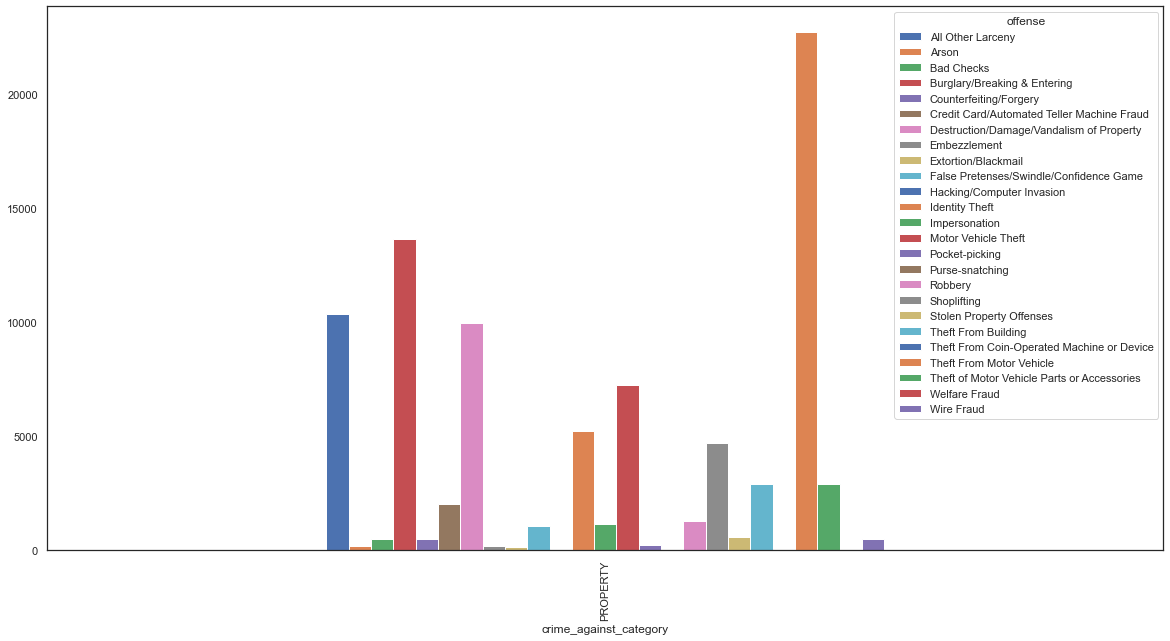

In [260]:
# Bar graph displaying figures on Morning hours crimes.
# 
fig, ax = plt.subplots(figsize=(20,10))
dfmorning_property.groupby(['crime_against_category','offense'])['offense'].count().sort_values(ascending=False).unstack().plot(kind='bar', ax=ax)



In [39]:
# Finding out which crimes are more commited in the Afternoon hours.
# Afternoon
dfafternoon_property = crimedata[(crimedata['time_slot'] == 'After Noon') & (crimedata['crime_against_category'] == 'PROPERTY')]
dfafternoon_property.head()

,report_number,offense_start_datetime,report_datetime,crime_against_category,offense_parent_group,offense,offense_code,precinct,sector,neighborhood,time_slot,report_hour
66,2016-000472,2015-12-31 19:00:00,2016-01-01 12:01:00,PROPERTY,LARCENY-THEFT,Theft From Motor Vehicle,23F,E,E,FIRST HILL,After Noon,12
67,2016-000495,2015-12-31 14:08:00,2016-01-01 12:01:00,PROPERTY,BURGLARY/BREAKING&ENTERING,Burglary/Breaking & Entering,220,N,L,NORTHGATE,After Noon,12
68,2016-000498,2016-01-01 12:10:00,2016-01-01 12:10:00,PROPERTY,LARCENY-THEFT,Shoplifting,23C,SW,W,ALASKA JUNCTION,After Noon,12
69,2016-000486,2015-12-20 16:00:00,2016-01-01 12:23:00,PROPERTY,LARCENY-THEFT,Theft From Motor Vehicle,23F,E,C,CAPITOL HILL,After Noon,12
70,2016-000443,2016-01-01 10:45:00,2016-01-01 12:24:00,PROPERTY,ROBBERY,Robbery,120,S,S,MID BEACON HILL,After Noon,12


In [40]:
# Grouping so that we get to plot the data on afternoon offences.
groupedp_afternoon = dfafternoon_property.groupby(['crime_against_category','offense'])['offense'].count().sort_values(ascending=False)

<AxesSubplot:xlabel='crime_against_category'>

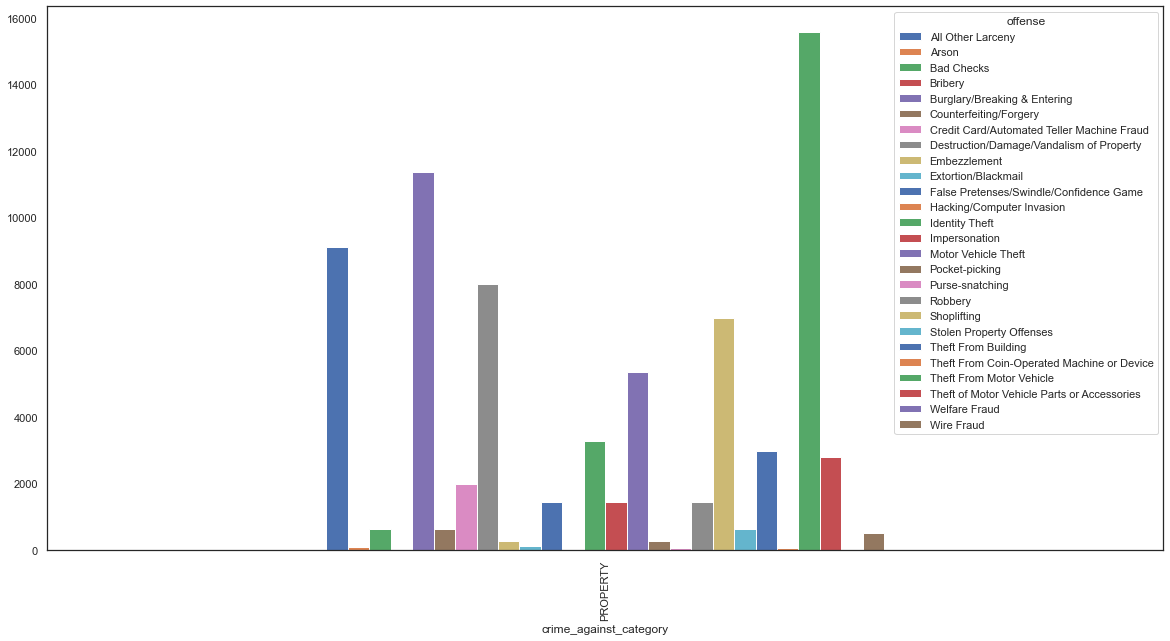

In [247]:
# Plotting afternoon offences.
fig, ax = plt.subplots(figsize=(20,10))
dfafternoon_property.groupby(['crime_against_category','offense'])['offense'].count().sort_values(ascending=False).unstack().plot(kind='bar', ax=ax)


In [42]:
# Most popular crime per neighberhood.
# 

dfneiba = crimedata.groupby(['neighborhood'])['crime_against_category'].value_counts(ascending=False)
# pd.set_option('display.max_rows', 3000)
dfneiba.head(1000)

neighborhood                      crime_against_category
ALASKA JUNCTION                   PROPERTY                   4688
                                  PERSON                      707
                                  SOCIETY                     385
ALKI                              PROPERTY                   1392
                                  PERSON                      270
                                  SOCIETY                     126
BALLARD NORTH                     PROPERTY                   6535
                                  PERSON                      771
                                  SOCIETY                     498
BALLARD SOUTH                     PROPERTY                  10543
                                  PERSON                     1597
                                  SOCIETY                    1055
BELLTOWN                          PROPERTY                   6555
                                  PERSON                     1670
                   

array([<AxesSubplot:title={'center':'NOT_A_CRIME'}, xlabel='neighborhood'>,
       <AxesSubplot:title={'center':'PERSON'}, xlabel='neighborhood'>,
       <AxesSubplot:title={'center':'PROPERTY'}, xlabel='neighborhood'>,
       <AxesSubplot:title={'center':'SOCIETY'}, xlabel='neighborhood'>],
      dtype=object)

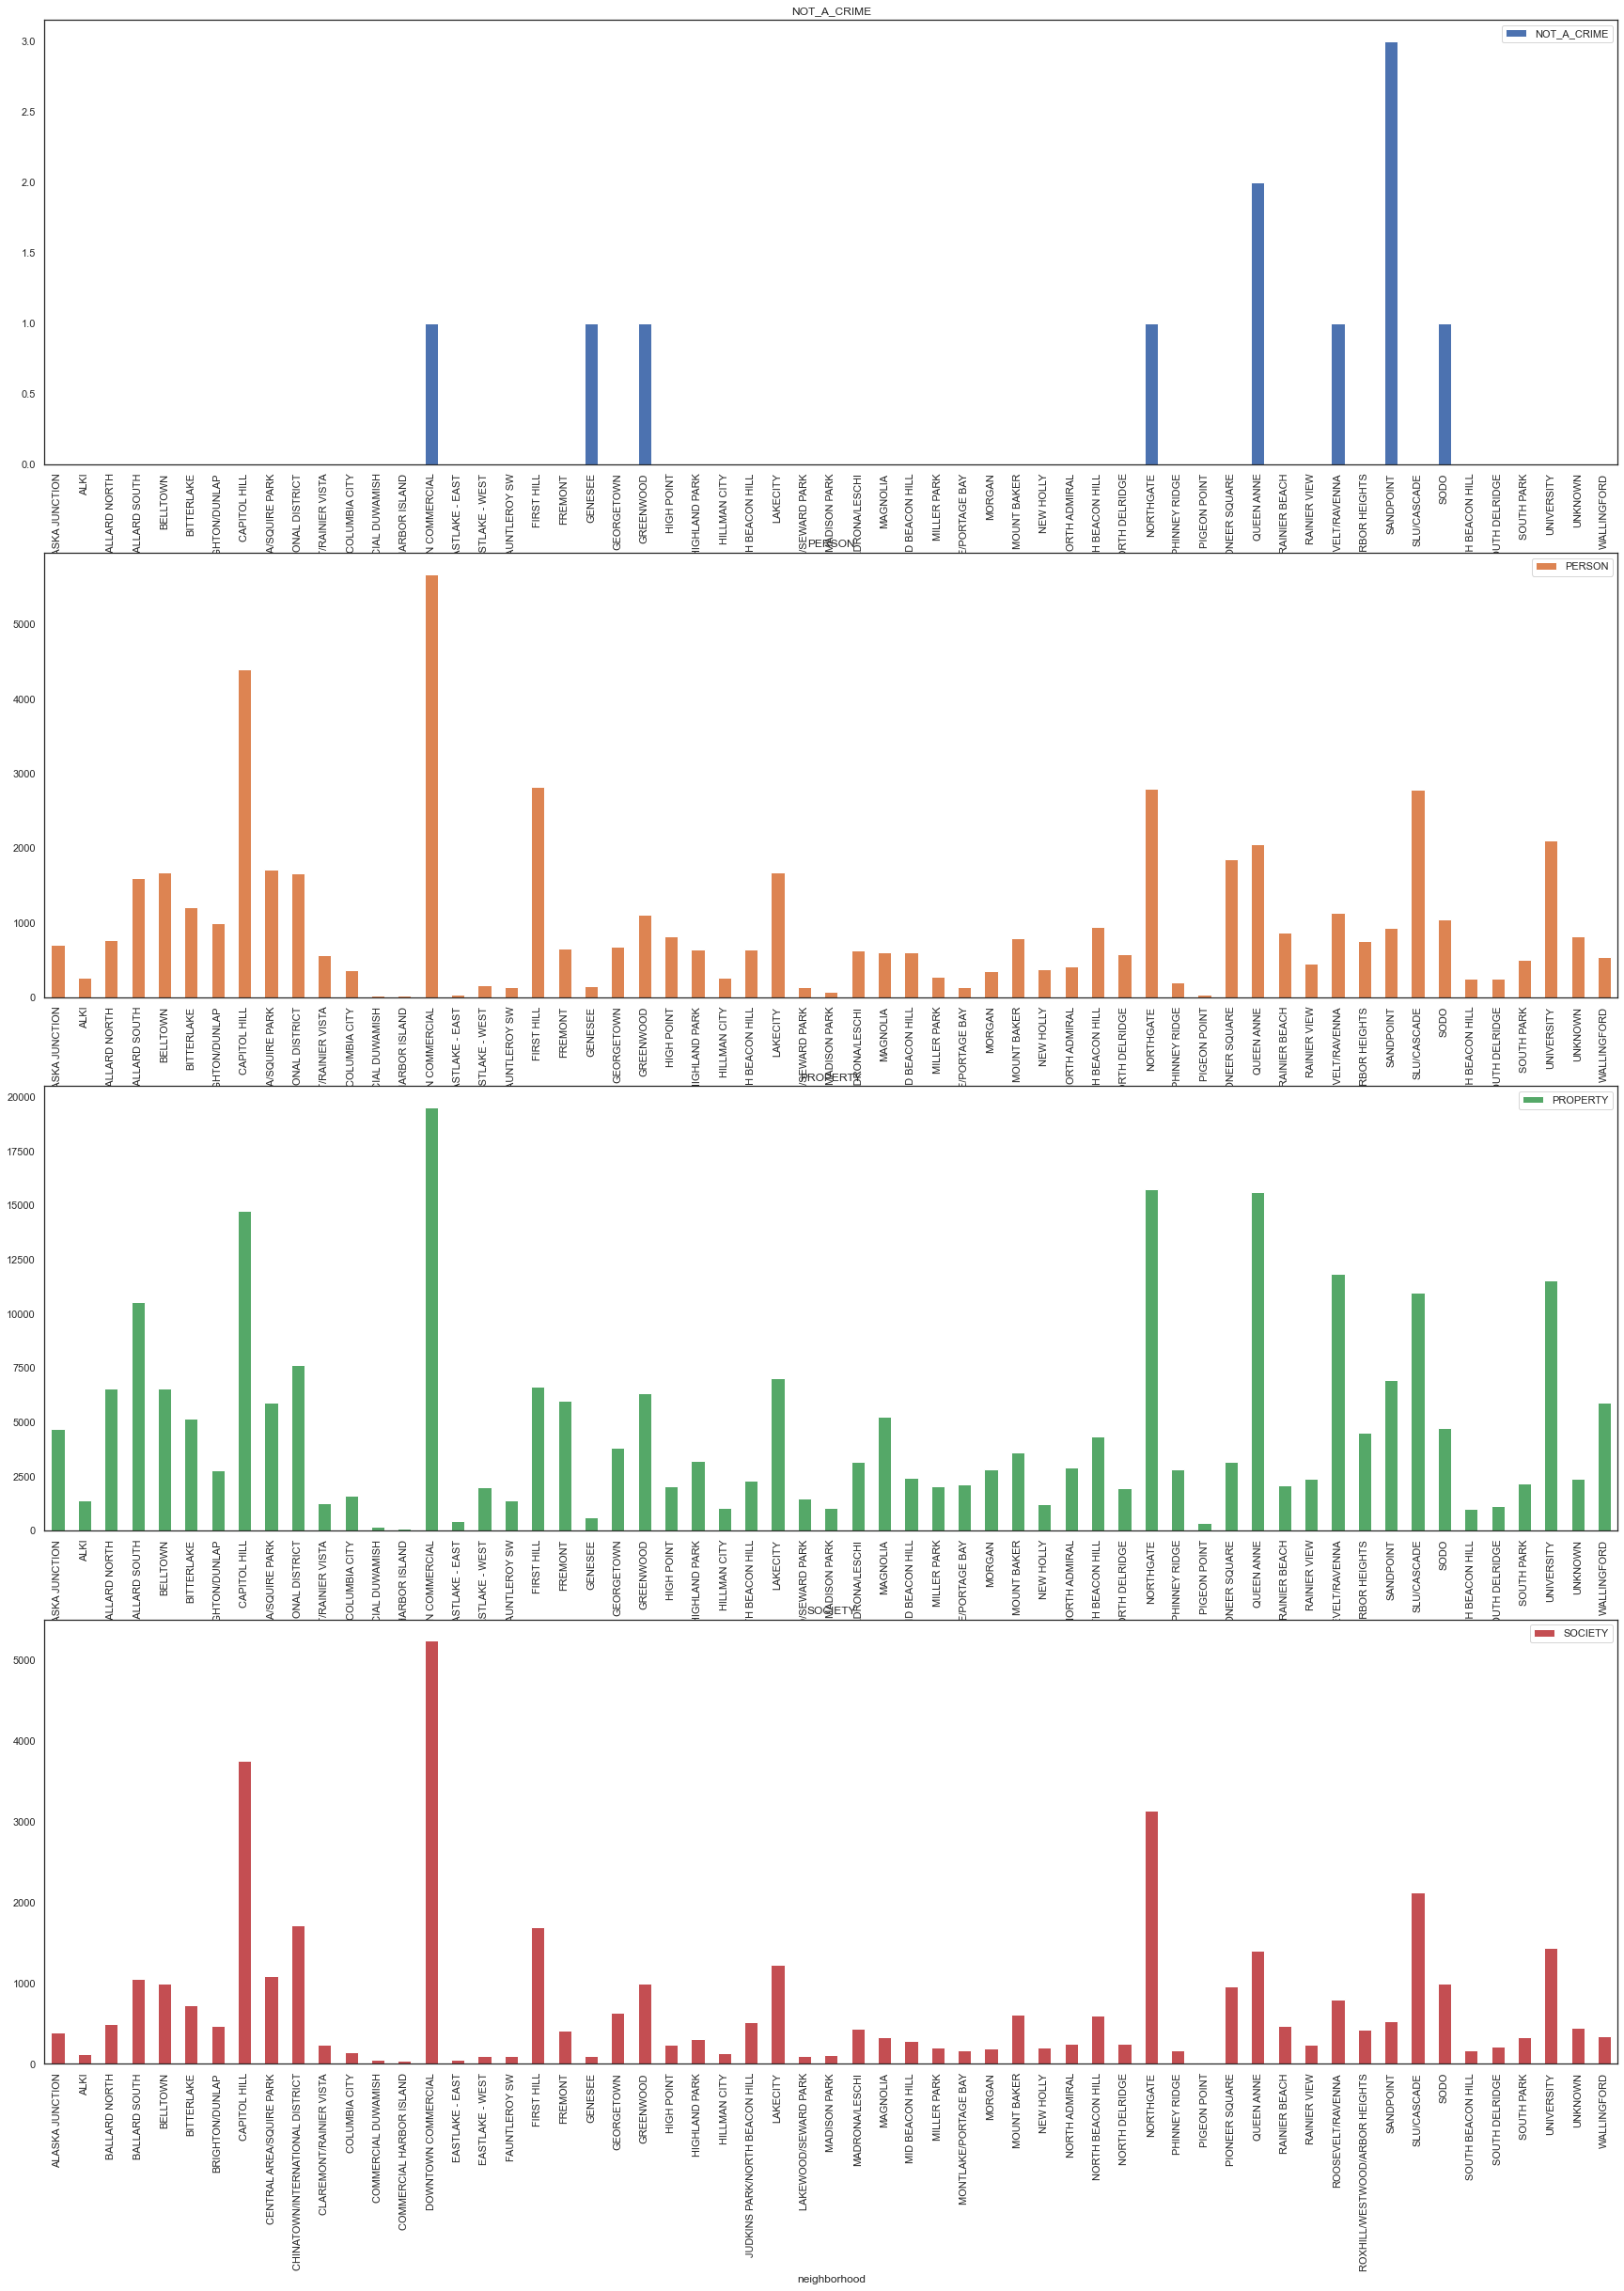

In [258]:
# Plotting data for most crimes per neighberhood.
fig, ax = plt.subplots(figsize=(30,40))
dfneiba.unstack().plot(kind='bar', subplots=True, ax=ax)


In [43]:
# Most Crimes per Precint
# 

dfprecint = crimedata.groupby(['precinct', 'time_slot'])['crime_against_category'].value_counts()
pd.set_option('display.max_rows', 500)
dfprecint

precinct  time_slot      crime_against_category
E         After Noon     PROPERTY                  10601
                         PERSON                     2019
                         SOCIETY                    1415
          Early Morning  PROPERTY                   1414
                         SOCIETY                     767
                         PERSON                      749
          Evening        PROPERTY                   5783
                         PERSON                     1753
                         SOCIETY                     901
          Late Night     PROPERTY                   2830
                         PERSON                     1665
                         SOCIETY                    1250
          Midnight       PROPERTY                   1409
                         PERSON                     1227
                         SOCIETY                     910
          Morning        PROPERTY                  12059
                         PERSON         

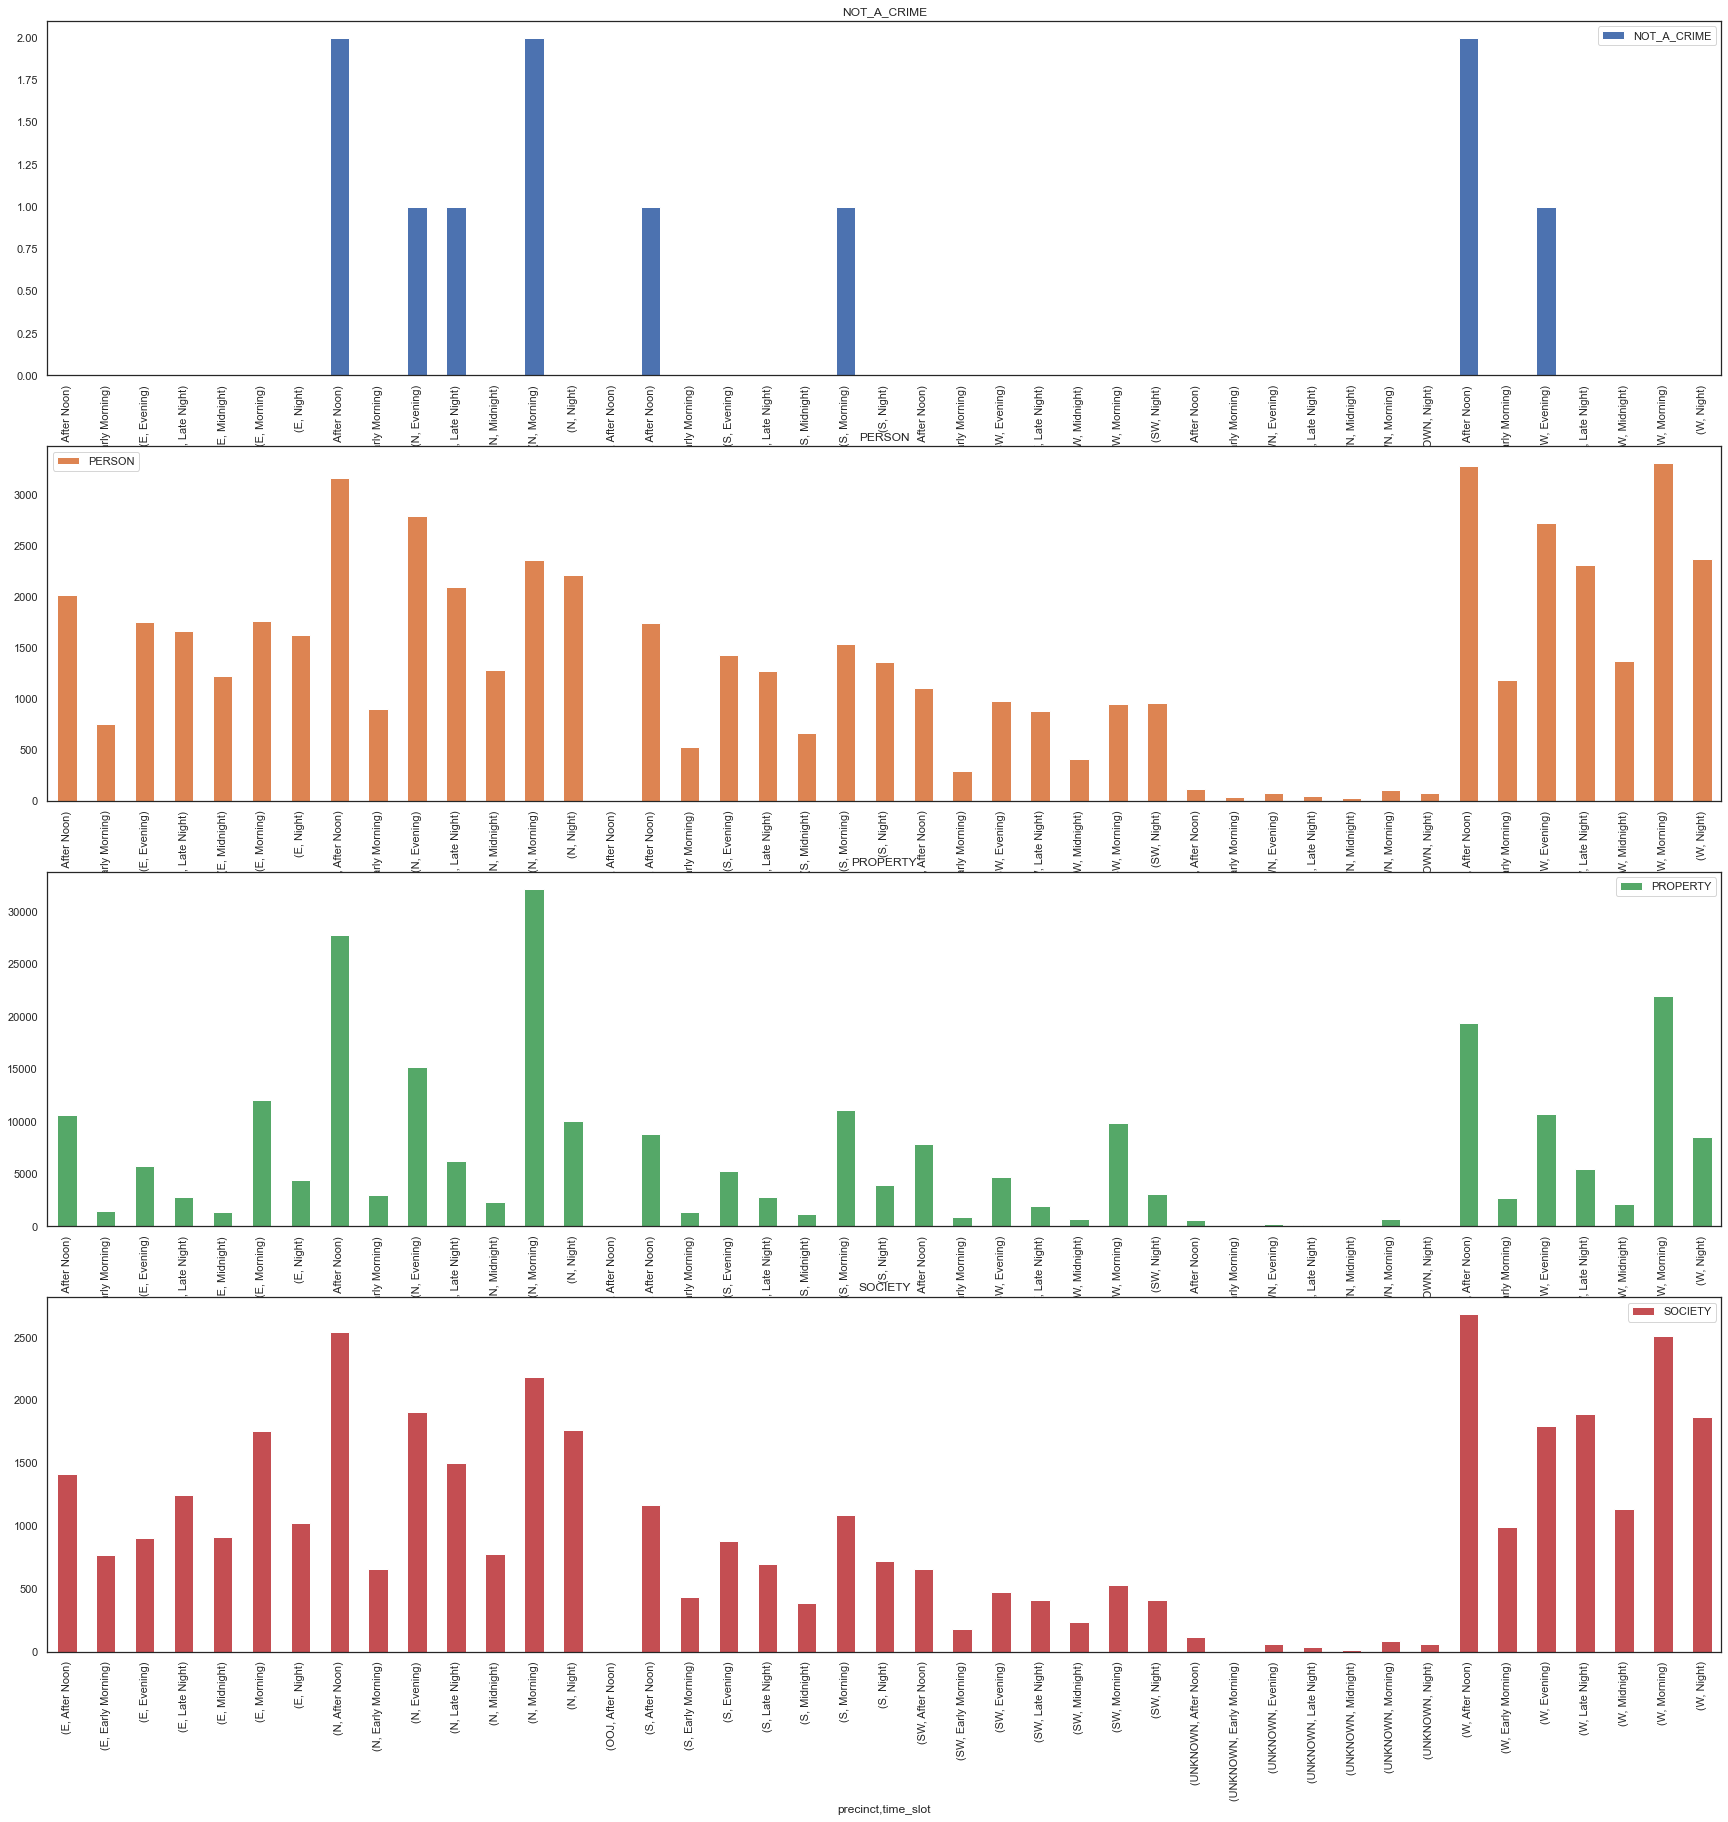

In [256]:
# Plotting data for most crimes per precint.
fig, ax = plt.subplots(figsize=(30,30))
dfprecint = crimedata.groupby(['precinct', 'time_slot'])['crime_against_category'].value_counts().sort_values(ascending=False).unstack().plot(kind='bar', subplots=True, ax=ax)





In [82]:
# Comparing 2019 and 2020 (Corona Virus impact)
# March 2020 to present & March 2019 to March 2020

df2019crimes = crimedata[(crimedata['report_datetime'] >= '2019-03-01') & (crimedata['report_datetime'] <= '2020-01-01')]
df2019crimes.tail()

,report_number,offense_start_datetime,report_datetime,crime_against_category,offense_parent_group,offense,offense_code,precinct,sector,neighborhood,time_slot,report_hour,Response Time,Response hours
289645,2019-483014,2019-12-31 21:30:00,2019-12-31 22:06:00,PROPERTY,ROBBERY,Robbery,120,SW,F,SOUTH DELRIDGE,Late Night,22,0 days 00:36:00,0.600000
289646,2019-483022,2019-12-31 21:35:00,2019-12-31 22:55:00,PERSON,ASSAULT OFFENSES,Intimidation,13C,W,K,CHINATOWN/INTERNATIONAL DISTRICT,Late Night,22,0 days 01:20:00,1.333333
289647,2019-482761,2019-12-31 16:59:00,2019-12-31 23:07:00,SOCIETY,DRIVING UNDER THE INFLUENCE,Driving Under the Influence,90D,N,B,FREMONT,Late Night,23,0 days 06:08:00,6.133333
289648,2019-483023,2019-12-31 21:40:00,2019-12-31 23:17:00,PERSON,ASSAULT OFFENSES,Simple Assault,13B,E,G,CENTRAL AREA/SQUIRE PARK,Late Night,23,0 days 01:37:00,1.616667
289649,2019-482956,2019-12-31 20:41:00,2019-12-31 23:38:00,PERSON,ASSAULT OFFENSES,Simple Assault,13B,W,K,DOWNTOWN COMMERCIAL,Late Night,23,0 days 02:57:00,2.950000


In [81]:
# Saving 2020 in a data frame.
df2020crimes = crimedata[(crimedata['report_datetime'] >= '2020-03-01') & (crimedata['report_datetime'] <= '2021-01-01')]
df2020crimes.tail()

,report_number,offense_start_datetime,report_datetime,crime_against_category,offense_parent_group,offense,offense_code,precinct,sector,neighborhood,time_slot,report_hour,Response Time,Response hours
366113,2020-357948,2020-12-31 00:00:00,2020-12-31 22:51:00,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,W,D,SLU/CASCADE,Late Night,22,0 days 22:51:00,22.850000
366114,2020-358000,2020-12-31 21:50:00,2020-12-31 23:26:00,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,W,M,DOWNTOWN COMMERCIAL,Late Night,23,0 days 01:36:00,1.600000
366115,2020-358705,2020-12-31 22:45:00,2020-12-31 23:49:00,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,E,C,CAPITOL HILL,Late Night,23,0 days 01:04:00,1.066667
366116,2020-358078,2020-12-31 23:43:00,2020-12-31 23:53:00,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,E,E,CAPITOL HILL,Late Night,23,0 days 00:10:00,0.166667
366117,2020-358078,2020-12-31 23:43:00,2020-12-31 23:53:00,SOCIETY,DRUG/NARCOTIC OFFENSES,Drug/Narcotic Violations,35A,E,E,CAPITOL HILL,Late Night,23,0 days 00:10:00,0.166667


In [51]:
# Getting number of crimes per hour in 2019
df2019crimes.time_slot.value_counts()

Morning          16999
After Noon       15784
Evening           8668
Night             5894
Late Night        5736
Early Morning     3071
Midnight          2938
Name: time_slot, dtype: int64

In [52]:
# Getting number of crimes per hour in 2020
df2020crimes.time_slot.value_counts()

Morning          22869
After Noon       18064
Evening           8432
Night             5454
Late Night        4841
Midnight          2704
Early Morning     2505
Name: time_slot, dtype: int64

In [53]:
# Getting crime category in 2019
# 
df2019crimes.crime_against_category.value_counts()

PROPERTY       42235
PERSON         10231
SOCIETY         6623
NOT_A_CRIME        1
Name: crime_against_category, dtype: int64

In [54]:
# Getting crime category in 2020
# 
df2020crimes.crime_against_category.value_counts()

PROPERTY       51635
PERSON          9086
SOCIETY         4146
NOT_A_CRIME        2
Name: crime_against_category, dtype: int64

<AxesSubplot:>

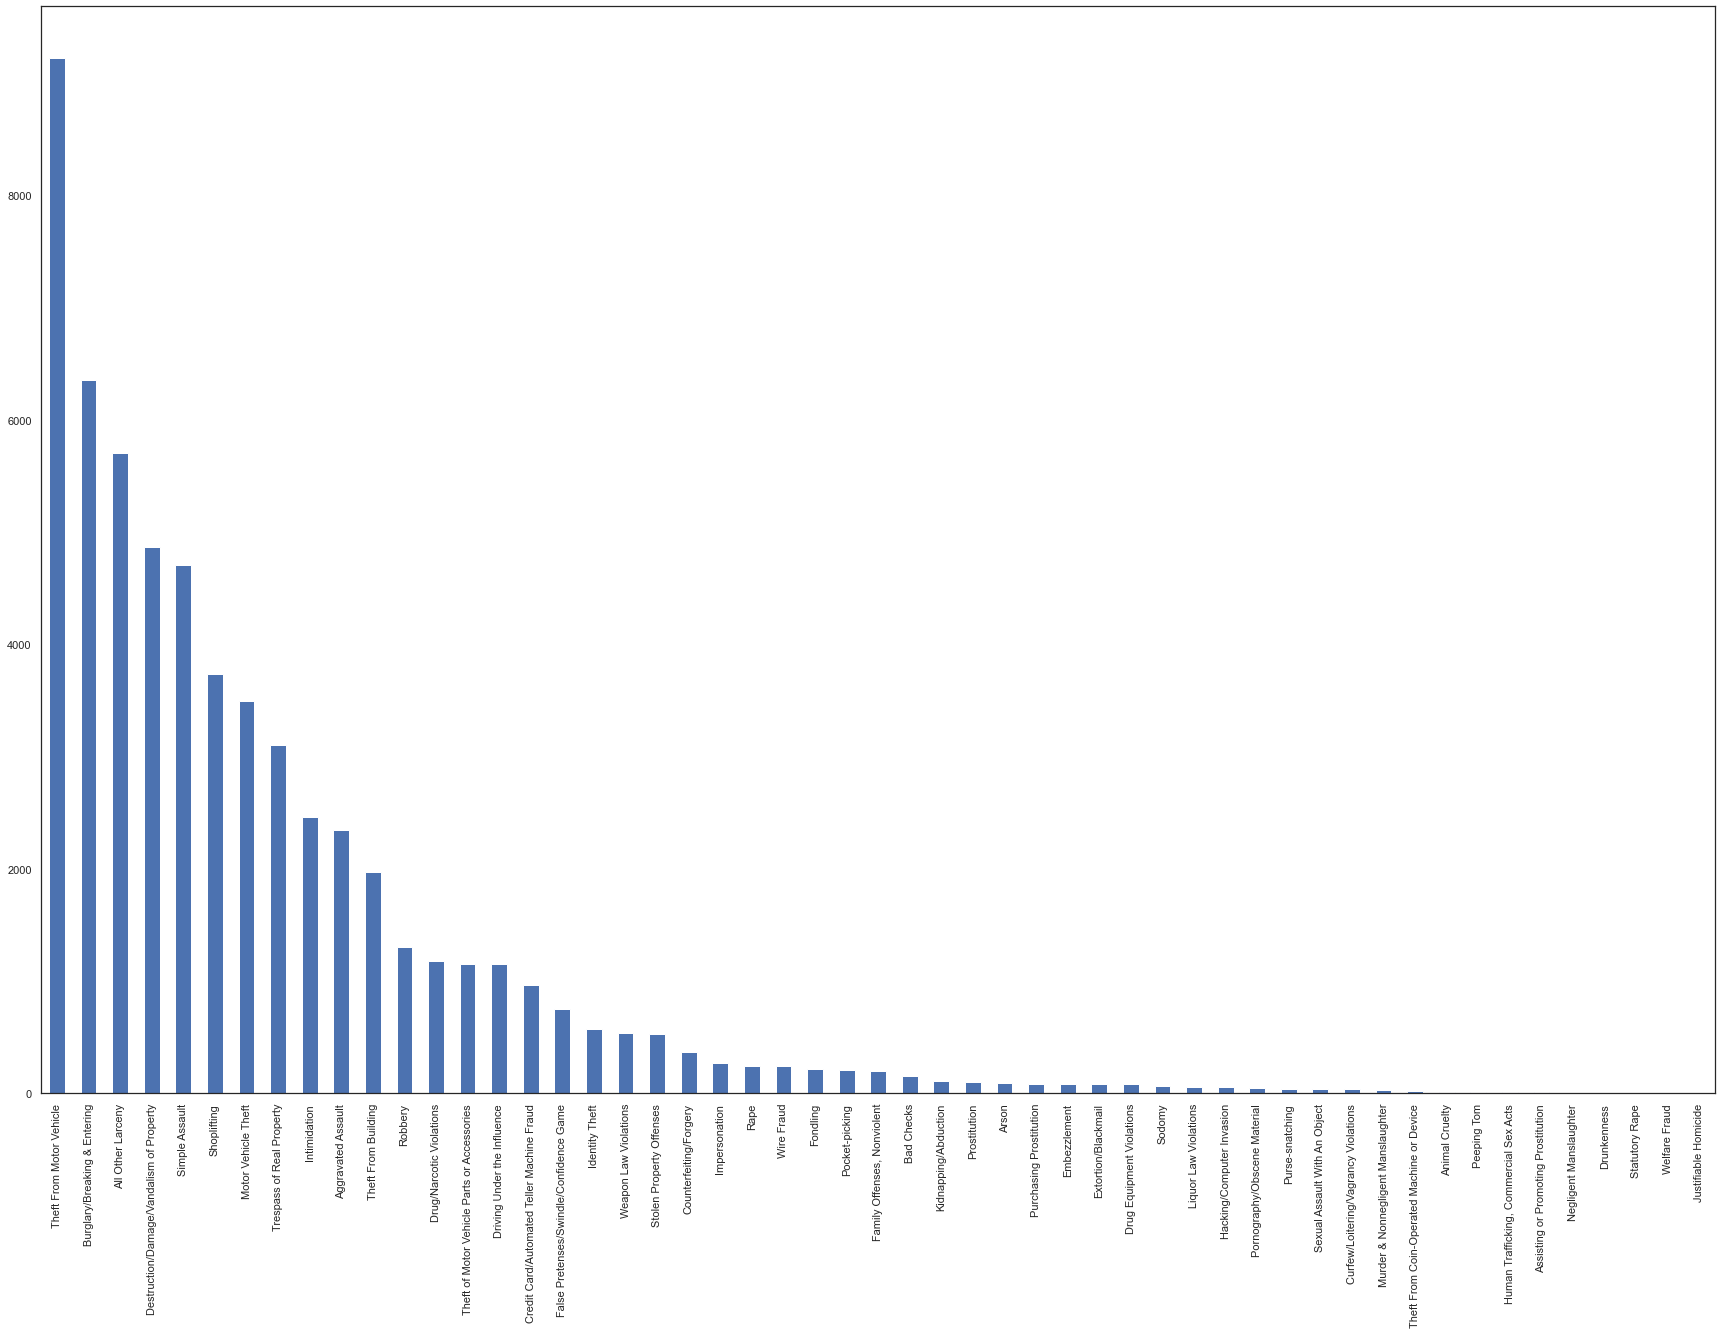

In [65]:
# Plotting the data for 2019
# 
fig, ax = plt.subplots(figsize=(30,20))
df2019crimes.offense.value_counts().sort_values(ascending=False).plot(kind='bar',ax=ax)

<AxesSubplot:>

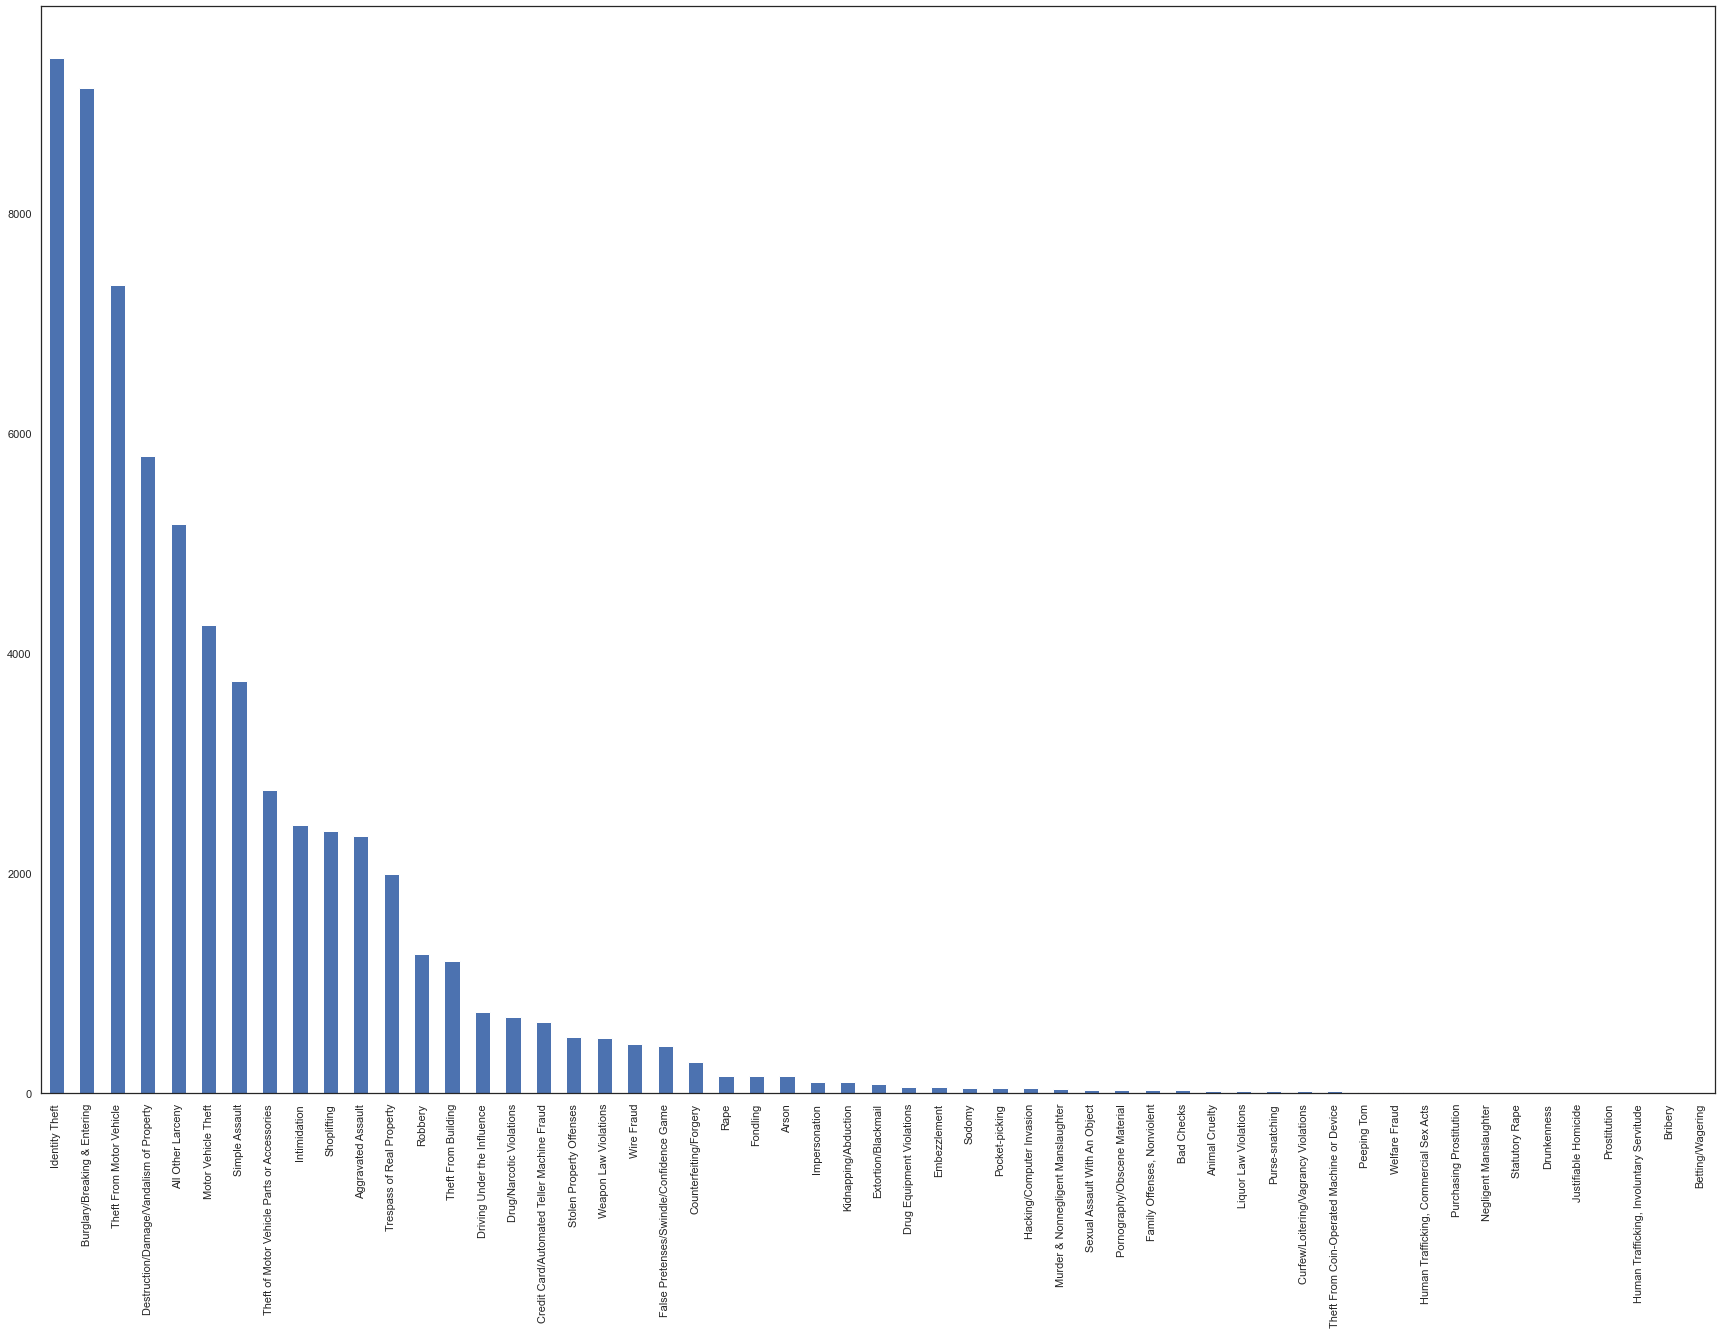

In [64]:
# Plotting the data for 2019
# 
fig, ax = plt.subplots(figsize=(30,20))
df2020crimes.offense.value_counts().sort_values(ascending=False).plot(kind='bar',ax=ax)

In [86]:
# Time difference
# To find crimes that are reported faster than others.

crimedata['Report Time'] = crimedata['report_datetime'] - crimedata['offense_start_datetime']
crimedata.tail()

,report_number,offense_start_datetime,report_datetime,crime_against_category,offense_parent_group,offense,offense_code,precinct,sector,neighborhood,time_slot,report_hour,Response Time,Response hours,Resport Time,Report Time
371721,2021-025446,2021-01-30 20:00:00,2021-01-30 23:16:00,PERSON,ASSAULT OFFENSES,Simple Assault,13B,E,E,FIRST HILL,Late Night,23,0 days 03:16:00,3.266667,0 days 03:16:00,0 days 03:16:00
371722,2021-025462,2021-01-30 20:48:00,2021-01-30 23:25:00,PERSON,ASSAULT OFFENSES,Simple Assault,13B,SW,F,NORTH DELRIDGE,Late Night,23,0 days 02:37:00,2.616667,0 days 02:37:00,0 days 02:37:00
371723,2021-025476,2021-01-30 21:09:00,2021-01-30 23:28:00,PROPERTY,STOLEN PROPERTY OFFENSES,Stolen Property Offenses,280,N,N,NORTHGATE,Late Night,23,0 days 02:19:00,2.316667,0 days 02:19:00,0 days 02:19:00
371724,2021-025474,2021-01-30 21:06:00,2021-01-30 23:52:00,PROPERTY,LARCENY-THEFT,Shoplifting,23C,N,N,BITTERLAKE,Late Night,23,0 days 02:46:00,2.766667,0 days 02:46:00,0 days 02:46:00
371725,2021-025536,2021-01-30 21:07:00,2021-01-30 23:55:00,SOCIETY,DRIVING UNDER THE INFLUENCE,Driving Under the Influence,90D,N,N,NORTHGATE,Late Night,23,0 days 02:48:00,2.800000,0 days 02:48:00,0 days 02:48:00


In [87]:
# Creating a time difference column.
crimedata['Report time Taken']= crimedata['Resport Time'] / np.timedelta64(1, 'h')
crimedata.tail()

,report_number,offense_start_datetime,report_datetime,crime_against_category,offense_parent_group,offense,offense_code,precinct,sector,neighborhood,time_slot,report_hour,Response Time,Response hours,Resport Time,Report Time,Report time Taken
371721,2021-025446,2021-01-30 20:00:00,2021-01-30 23:16:00,PERSON,ASSAULT OFFENSES,Simple Assault,13B,E,E,FIRST HILL,Late Night,23,0 days 03:16:00,3.266667,0 days 03:16:00,0 days 03:16:00,3.266667
371722,2021-025462,2021-01-30 20:48:00,2021-01-30 23:25:00,PERSON,ASSAULT OFFENSES,Simple Assault,13B,SW,F,NORTH DELRIDGE,Late Night,23,0 days 02:37:00,2.616667,0 days 02:37:00,0 days 02:37:00,2.616667
371723,2021-025476,2021-01-30 21:09:00,2021-01-30 23:28:00,PROPERTY,STOLEN PROPERTY OFFENSES,Stolen Property Offenses,280,N,N,NORTHGATE,Late Night,23,0 days 02:19:00,2.316667,0 days 02:19:00,0 days 02:19:00,2.316667
371724,2021-025474,2021-01-30 21:06:00,2021-01-30 23:52:00,PROPERTY,LARCENY-THEFT,Shoplifting,23C,N,N,BITTERLAKE,Late Night,23,0 days 02:46:00,2.766667,0 days 02:46:00,0 days 02:46:00,2.766667
371725,2021-025536,2021-01-30 21:07:00,2021-01-30 23:55:00,SOCIETY,DRIVING UNDER THE INFLUENCE,Driving Under the Influence,90D,N,N,NORTHGATE,Late Night,23,0 days 02:48:00,2.800000,0 days 02:48:00,0 days 02:48:00,2.800000


In [93]:
# Getting Crimes that take more than a day to be reported
# 

dfreporting_max = crimedata[crimedata['Report time Taken'] > 24.0]
dfreporting_max.head()

,report_number,offense_start_datetime,report_datetime,crime_against_category,offense_parent_group,offense,offense_code,precinct,sector,neighborhood,time_slot,report_hour,Response Time,Response hours,Resport Time,Report Time,Report time Taken
41,2016-900004,2015-12-30 10:00:00,2016-01-01 07:07:00,PROPERTY,LARCENY-THEFT,All Other Larceny,23H,W,Q,QUEEN ANNE,Morning,7,1 days 21:07:00,45.116667,1 days 21:07:00,1 days 21:07:00,45.116667
46,2016-900382,2015-12-31 08:35:00,2016-01-01 08:45:00,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,SW,F,ROXHILL/WESTWOOD/ARBOR HEIGHTS,Morning,8,1 days 00:10:00,24.166667,1 days 00:10:00,1 days 00:10:00,24.166667
51,2016-000404,2015-12-13 08:00:00,2016-01-01 09:39:00,PROPERTY,LARCENY-THEFT,All Other Larceny,23H,W,D,BELLTOWN,Morning,9,19 days 01:39:00,457.650000,19 days 01:39:00,19 days 01:39:00,457.650000
56,2016-000430,2015-12-24 04:00:00,2016-01-01 10:25:00,PROPERTY,LARCENY-THEFT,Theft From Motor Vehicle,23F,W,Q,QUEEN ANNE,Morning,10,8 days 06:25:00,198.416667,8 days 06:25:00,8 days 06:25:00,198.416667
58,2016-900008,2015-12-28 08:00:00,2016-01-01 10:56:00,PROPERTY,LARCENY-THEFT,All Other Larceny,23H,N,B,BALLARD SOUTH,Morning,10,4 days 02:56:00,98.933333,4 days 02:56:00,4 days 02:56:00,98.933333


In [94]:
# Getting the value counts to get which crimes take more than a day.
dfreporting_max.offense.value_counts()

Theft From Motor Vehicle                       20978
Burglary/Breaking & Entering                   15438
All Other Larceny                              15274
Identity Theft                                  9807
Destruction/Damage/Vandalism of Property        8707
Motor Vehicle Theft                             6057
Theft of Motor Vehicle Parts or Accessories     5187
Theft From Building                             4440
Shoplifting                                     4125
Credit Card/Automated Teller Machine Fraud      3887
Impersonation                                   2835
False Pretenses/Swindle/Confidence Game         2012
Intimidation                                    1796
Simple Assault                                  1699
Bad Checks                                      1122
Wire Fraud                                      1054
Aggravated Assault                               919
Counterfeiting/Forgery                           753
Trespass of Real Property                     

In [96]:
# Getting Crimes that take less than an hour to be reported
# 

dfreporting_min = crimedata[crimedata['Report time Taken'] < 1.0]
dfreporting_min.head()

,report_number,offense_start_datetime,report_datetime,crime_against_category,offense_parent_group,offense,offense_code,precinct,sector,neighborhood,time_slot,report_hour,Response Time,Response hours,Resport Time,Report Time,Report time Taken
2,2016-000033,2016-01-01 00:15:00,2016-01-01 00:15:00,PERSON,ASSAULT OFFENSES,Aggravated Assault,13A,SW,W,ALKI,Late Night,0,0 days,0.0,0 days,0 days,0.0
3,2016-000042,2016-01-01 00:27:00,2016-01-01 00:27:00,PERSON,ASSAULT OFFENSES,Simple Assault,13B,W,Q,QUEEN ANNE,Late Night,0,0 days,0.0,0 days,0 days,0.0
4,2016-000059,2016-01-01 00:41:00,2016-01-01 00:41:00,PERSON,ASSAULT OFFENSES,Simple Assault,13B,E,E,CAPITOL HILL,Late Night,0,0 days,0.0,0 days,0 days,0.0
5,2016-000066,2016-01-01 00:46:00,2016-01-01 00:46:00,SOCIETY,DRIVING UNDER THE INFLUENCE,Driving Under the Influence,90D,W,K,DOWNTOWN COMMERCIAL,Late Night,0,0 days,0.0,0 days,0 days,0.0
6,2016-000072,2016-01-01 00:55:00,2016-01-01 00:55:00,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,E,E,CAPITOL HILL,Late Night,0,0 days,0.0,0 days,0 days,0.0


In [97]:
# Getting the value counts to get which crimes take less than an hour.
dfreporting_min.offense.value_counts()

Simple Assault                                 15519
Trespass of Real Property                      11580
Shoplifting                                    11052
Destruction/Damage/Vandalism of Property       10292
Burglary/Breaking & Entering                    7950
Aggravated Assault                              6828
Theft From Motor Vehicle                        6290
Intimidation                                    5460
All Other Larceny                               5038
Drug/Narcotic Violations                        4800
Robbery                                         4476
Driving Under the Influence                     3286
Weapon Law Violations                           2275
Family Offenses, Nonviolent                     1879
Theft From Building                             1801
Motor Vehicle Theft                             1661
Stolen Property Offenses                        1542
False Pretenses/Swindle/Confidence Game         1332
Prostitution                                  